In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = '/content/drive/MyDrive/DataSet/2020년_산업중분류(56_음식점 및 주점업)_CSV(항목명포함).csv'
data = pd.read_csv(df, sep=',', encoding='cp949')
data

<ipython-input-9-523f69f34313>:2: DtypeWarning: Columns (0,4,5,6,7,8,14,15,16,17,19,20,21,22,23,24,25,26,27,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,49,50,51,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(df, sep=',', encoding='cp949')


,기준연도,행정구역시도코드,행정구역시군구코드,행정구역읍면동코드,사업체대표자성별코드,창설연도,창설월,조직형태코드,사업체구분코드,자산총액,...,건물_합계면적,일일평균영업시간코드,온라인쇼핑거래존재여부,전체매출액_온라인쇼핑거래액비중,디지털플랫폼이용여부,무인결제기기도입여부,객석여부,객석수,배달택배판매여부,대량대체여부
0,2020,11,10,53,1,1992,11,1,NaN,NaN,...,190,5,2,NaN,2,2,1,130.0,1,N
1,2020,11,10,53,1,1994,12,1,NaN,NaN,...,50,2,1,1.0,1,2,1,30.0,1,N
2,2020,11,10,53,1,1994,5,1,NaN,NaN,...,116,2,2,NaN,2,2,2,NaN,2,Y
3,2020,11,10,53,1,1996,11,2,1.0,504.0,...,43,4,1,8.0,1,1,1,16.0,1,N
4,2020,11,10,53,1,1997,5,1,NaN,NaN,...,72,2,2,NaN,2,2,1,19.0,2,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804168,2020,39,20,62,2,2020,7,1,NaN,NaN,...,17,4,2,NaN,2,2,2,NaN,2,Y
804169,2020,39,20,62,2,2020,7,1,NaN,NaN,...,660,5,2,NaN,2,2,1,80.0,2,N
804170,2020,39,20,62,2,2020,8,1,NaN,NaN,...,50,2,2,NaN,2,2,1,11.0,2,Y
804171,2020,39,20,62,2,2020,8,1,NaN,NaN,...,33,1,1,40.0,1,2,1,24.0,2,N


In [10]:
for i, row in tqdm(data.iterrows()):
    data.loc[i, 'null개수'] = row.isnull().sum()

0it [00:00, ?it/s]

In [ ]:
from scipy.stats import shapiro
print(shapiro(data['null개수']))        # 통계량에 대한 p-value=0.0이므로 정규분포를 따른다는 귀무가설 기각 => 정규분포를 따르지 않음

ShapiroResult(statistic=0.9174997806549072, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
from scipy.stats import anderson
result = anderson(data['null개수'])
result                                  # 유의수준 0.05%에 대하여 기각역 0.787을 넘어가므로 귀무가설 기각 => 정규분포를 따르지 않음

AndersonResult(statistic=27767.922990287887, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=20.601595676552186, scale=3.2597986826605356)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [ ]:
from scipy import stats
stats.kstest(data['null개수'], 'norm')  # p-value=0.0이므로 귀무가설 기각 => 정규분포를 따르지 않음

KstestResult(statistic=0.9999999999987201, pvalue=0.0, statistic_location=7.0, statistic_sign=-1)

In [11]:
for i, row in tqdm(data.iterrows()):
    data.loc[i, 'str_count'] = row.str.contains(r'\*').sum()

0it [00:00, ?it/s]

In [ ]:
from scipy.stats import shapiro
print(shapiro(data['str_count']))       # 통계량에 대한 p-value=0.0이므로 정규분포를 따른다는 귀무가설 기각 => 정규분포를 따르지 않음

ShapiroResult(statistic=0.000516355037689209, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
from scipy.stats import anderson
result = anderson(data['str_count'])
result                                  # 유의수준 0.05%에 대하여 기각역 0.787을 넘어가므로 귀무가설 기각 => 정규분포를 따르지 않음

AndersonResult(statistic=310639.954133983, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.0008145013572950099, scale=0.15322579614056353)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [ ]:
from scipy import stats
stats.kstest(data['str_count'], 'norm') # p-value=0.0이므로 귀무가설 기각 => 정규분포를 따르지 않음

KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)

In [ ]:
# 결측치 빈도와 문자열 빈도 상관성 검정

c, p = stats.pearsonr(x=data['null개수'], y=data['str_count'])
print(f'stats: {c:.2f} p-value: {p:.2f}')
# p-value=0.4 > 0.05로, 귀무가설 기각하지 못 함 => 두 변수는 서로 상관관계가 없음

stats: 0.00 p-value: 0.40


In [ ]:
# 결측치 빈도와 문자열 빈도 쌍체 검정

t, p = stats.ttest_rel(a=data['null개수'], b=data['str_count'])
print(f'stats: {t:.2f} p-value: {p:.2f}')
# p-value=0.00 < 0.05로, 두 분포 간 평균에 차이가 있음

stats: 5661.19 p-value: 0.00


In [12]:
cat_columns = ['str_count', 'null개수']

In [13]:
corr_mat = np.round(data[cat_columns].corr(), 4)
corr_mat_long = corr_mat.stack().reset_index(name="correlation")

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


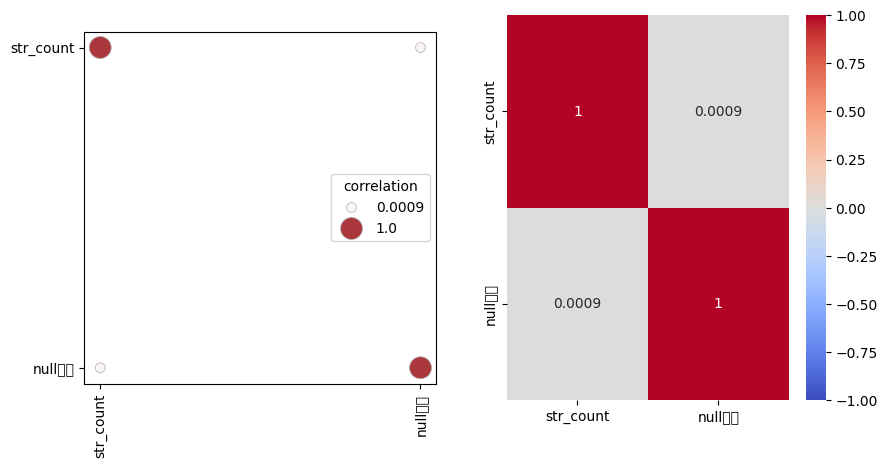

In [14]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
ax = sns.scatterplot(data=corr_mat_long, x="level_0", y="level_1", hue="correlation", palette="vlag", hue_norm=(-1, 1), edgecolor=".7", sizes=(50, 250), size="correlation")
ax.set(xlabel="", ylabel="", aspect="equal")
for label in ax.get_xticklabels():
  label.set_rotation(90)

plt.subplot(1, 2, 2)
heatmap = sns.heatmap(corr_mat, vmin = -1, vmax = 1, annot = True, cmap = "coolwarm")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


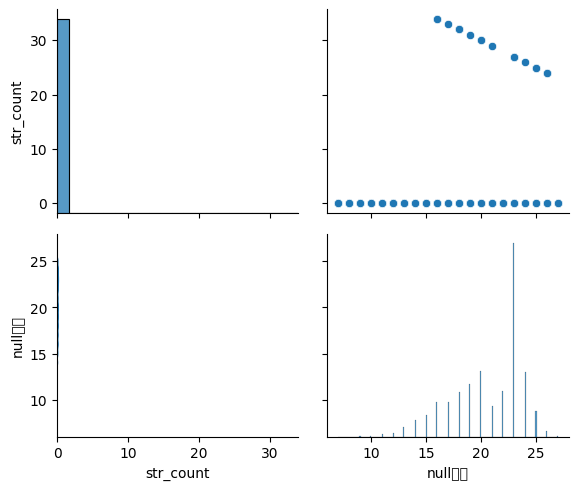

In [15]:
ax = sns.PairGrid(data[cat_columns], diag_sharey=False, aspect=1.2)
ax.map_upper(sns.scatterplot)
ax.map_lower(sns.kdeplot)
ax.map_diag(sns.histplot)